In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

## Data Preprocessing

In [24]:
# import dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [25]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
cancer.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# matrix of features
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

In [30]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X.shape

(569, 30)

In [32]:
y = cancer.target
print(y)
print(cancer.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [33]:
X.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [34]:
X.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [35]:
 # spliting the data into Train And Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [36]:
print(f"X_train.shape : {X_train.shape}")
print(f"X_test.shape : {X_test.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"y_test.shape : {y_test.shape}")

X_train.shape : (455, 30)
X_test.shape : (114, 30)
y_train.shape : (455,)
y_test.shape : (114,)


In [37]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
X_train

array([[-0.87737439, -0.99632936, -0.84836506, ..., -0.11026997,
         0.63086499,  0.39596053],
       [ 0.23276443, -0.39373657,  0.19955174, ...,  0.79850777,
         0.81341746, -0.68247993],
       [ 0.20707998, -0.53919   ,  0.11856132, ..., -0.53687358,
        -0.62276969, -0.8610112 ],
       ...,
       [-0.03264151, -0.83471443, -0.10044337, ..., -0.49926369,
        -1.25120254, -0.92628669],
       [-0.99152748, -0.95246245, -1.01365162, ..., -1.76049983,
        -0.3239006 , -1.23090567],
       [ 2.8868238 ,  0.21347378,  3.06520748, ...,  1.69039945,
         0.50323981, -0.20156131]])

In [41]:
X_test

array([[ 0.08151158, -0.63154139,  0.08798331, ...,  0.4101281 ,
         0.23021885,  0.2196609 ],
       [-0.59484549,  0.7952875 , -0.54836995, ..., -0.08417331,
        -1.16234957,  0.54603838],
       [ 1.53981732, -0.08666822,  1.54870329, ...,  1.27899331,
         0.09290062,  0.86962631],
       ...,
       [-0.87166673, -0.10282971, -0.77357289, ...,  2.11408637,
         2.00889384,  3.15761613],
       [ 0.6066158 ,  0.60134959,  0.6396272 , ..., -0.1532527 ,
        -0.28189738, -0.23280429],
       [-0.70329092,  0.17191565, -0.69464856, ..., -0.51400062,
         0.47739167,  0.3234322 ]])

In [42]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [45]:
X_train = X_train.reshape(455, 30, 1)
X_test = X_test.reshape(114, 30, 1)

In [46]:
X_train.shape, X_test.shape

((455, 30, 1), (114, 30, 1))

## Build The Model

In [65]:
model = keras.Sequential([
    keras.layers.Conv1D(32, (2), activation="relu", input_shape = (30,1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv1D(64, (2),activation="relu"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dropout(0.4),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [66]:
# model.summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [67]:
## compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [68]:
## fit the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 1s 1ms/sample - loss: 0.2739 - accuracy: 0.8879 - val_loss: 0.3528 - val_accuracy: 0.9737
Epoch 2/50
455/455 [==============================] - 0s 163us/sample - loss: 0.1864 - accuracy: 0.9473 - val_loss: 0.2745 - val_accuracy: 0.9649
Epoch 3/50
455/455 [==============================] - 0s 178us/sample - loss: 0.1066 - accuracy: 0.9714 - val_loss: 0.2453 - val_accuracy: 0.9737
Epoch 4/50
455/455 [==============================] - 0s 172us/sample - loss: 0.0714 - accuracy: 0.9714 - val_loss: 0.2185 - val_accuracy: 0.9386
Epoch 5/50
455/455 [==============================] - 0s 175us/sample - loss: 0.0434 - accuracy: 0.9802 - val_loss: 0.2046 - val_accuracy: 0.9386
Epoch 6/50
455/455 [==============================] - 0s 178us/sample - loss: 0.0282 - accuracy: 0.9890 - val_loss: 0.1885 - val_accuracy: 0.9211
Epoch 7/50
455/455 [==============================] - 0s 179us/sample - loss: 0.

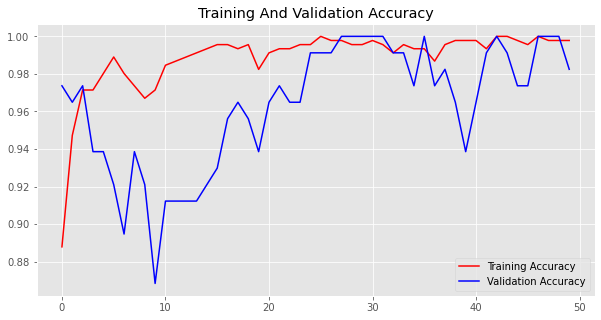

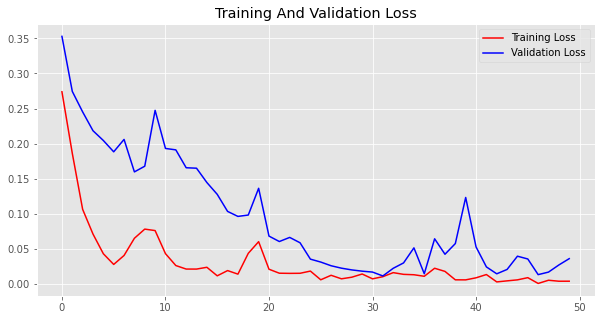

In [69]:
## plot accuracy and loss
acc = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc, "r", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.title("Training And Validation Accuracy")

plt.legend()
plt.show()

plt.figure(figsize=(10,5))

plt.plot(epochs, loss, "r", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training And Validation Loss")

plt.legend()
plt.show()

## Model Predictions

In [70]:
y_pred = model.predict_classes(X_test)

In [71]:
y_pred[2], y_test[2]

(array([0]), 0)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

[[34  0]
 [ 2 78]]


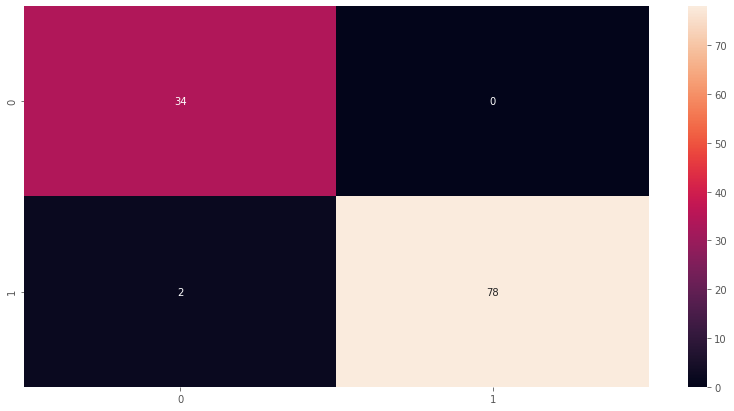

In [73]:
plt.figure(figsize=(14,7))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [74]:
print(accuracy_score(y_test, y_pred))

0.9824561403508771
